<a href="https://colab.research.google.com/github/sajidkhan2067/DataAnalysis-Visualization-Data-set-comparison/blob/main/Copy_of_BoxPlot_DDoS_Data_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the required modules.

In [ ]:
!pip install inflect
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import ipaddress
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import heapq
import math

#Listing the features

In [ ]:
features=[ 'Flow Duration', 'Fwd Pkt Len Std','ACK Flag Cnt', 'Protocol','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Seg Size Min', 'Pkt Size Avg','Pkt Len Mean']

# Read data from attack and normal datasets

In [ ]:
df = pd.concat(
     map(pd.read_csv, [
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0.pcap_Flow.csv','/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_01.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_010.pcap_Flow.csv','/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_011.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0100.pcap_Flow.csv','/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0101.pcap_Flow.csv'
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0102.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0103.pcap_Flow.csv'
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0104.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0105.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0106.pcap_Flow.csv','/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0107.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0108.pcap_Flow.csv','/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0109.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0110.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0111.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0112.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0113.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0114.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0115.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0116.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0117.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0118.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0119.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0120.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0121.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0122.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0123.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0124.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0125.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0126.pcap_Flow.csv',  '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0127.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0128.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0129.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0130.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0131.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0132.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0133.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0134.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0135.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0136.pcap_Flow.csv','/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0137.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0138.pcap_Flow.csv','/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0139.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0140.pcap_Flow.csv','/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0141.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0142.pcap_Flow.csv','/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0143.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0144.pcap_Flow.csv','/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0145.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0146.pcap_Flow.csv','/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0147.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0148.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0149.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0150.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0151.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0152.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0153.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0154.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0155.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0156.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0157.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0158.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0159.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0160.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0161.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0162.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0163.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0164.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0165.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0166.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0167.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0168.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0169.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0170.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0171.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0172.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0173.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0174.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0175.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0276.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0277.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0278.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0279.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0280.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0281.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0282.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0283.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0284.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0285.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0286.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0287.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0288.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0289.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0290.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0291.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0292.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0293.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0294.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0295.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0296.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0297.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Benign/SAT-01-12-2018_0298.pcap_Flow.csv',   ]), ignore_index=True)

cicDDoS2019DfBenign=df[features]
print(cicDDoS2019DfBenign.shape)

(1183825, 11)


In [ ]:
df = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/Colab Notebooks/LSTM/createdDataset/udpflood.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/createdDataset/tcpsyn.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/createdDataset/tcprst.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/createdDataset/tcppush.pcap_Flow.csv'
                      ,'/content/drive/MyDrive/Colab Notebooks/LSTM/createdDataset/tcpfin.pcap_Flow.csv' ]), ignore_index=True)

oldVmDfAttack=df[features]

In [ ]:
df = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Attack/SAT-01-12-2018_0586.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Attack/SAT-01-12-2018_0587.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Attack/SAT-01-12-2018_0586.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Attack/SAT-01-12-2018_0587.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Attack/SAT-01-12-2018_0588.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Attack/SAT-01-12-2018_0589.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Attack/SAT-01-12-2018_0590.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Attack/SAT-01-12-2018_0591.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Attack/SAT-01-12-2018_0592.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/CICDDoS2019/Attack/SAT-01-12-2018_0593.pcap_Flow.csv',
                      ]), ignore_index=True)

In [ ]:
cicDDoS2019DfAttack=df[features]
print(cicDDoS2019DfAttack.shape)

(1162601, 11)


In [ ]:
df = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/Colab Notebooks/LSTM/createdDataset/normal.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/createdDataset/secondslice.pcap_Flow.csv']),
    ignore_index=True)
oldVmDfBenign=df[features]


In [ ]:
df = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/Colab Notebooks/LSTM/IdahoLab/ue1_converted00.pcap_Flow.csv', '/content/drive/MyDrive/Colab Notebooks/LSTM/IdahoLab/conterted01.pcap_Flow.csv']),
    ignore_index=True)
OldselectiveIdahoTrafficDf=df[features]

df = pd.concat(
      map(pd.read_csv, ['/content/drive/MyDrive/Colab Notebooks/LSTM/IdahoLab/UE1_1000Second/allcap_00006_20220607091008.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/IdahoLab/UE1_1000Second/allcap_00005_20220607051008.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/IdahoLab/UE1_1000Second/allcap_00004_20220607011007.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/IdahoLab/UE1_1000Second/allcap_00003_20220606211007.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/IdahoLab/UE1_1000Second/allcap_00002_20220606171007.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/IdahoLab/UE1_1000Second/allcap_00001_20220606131007.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/IdahoLab/UE1_1000Second/allcap_00001_20220606102554.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/IdahoLab/UE2_1000Second/allcap_20220613162057_00000.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/IdahoLab/UE2_1000Second/allcap_20220613162057_00001.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/IdahoLab/UE2_1000Second/allcap_20220613162057_00002.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/IdahoLab/UE2_1000Second/allcap_20220613162057_00003.pcap_Flow.csv',
      '/content/drive/MyDrive/Colab Notebooks/LSTM/IdahoLab/UE2_1000Second/allcap_20220613162057_00004.pcap_Flow.csv']),
      ignore_index=True)

selectiveIdahoTrafficDf=df[features]

In [ ]:
df = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230530_Benign/upf1.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230530_Benign/upf2.csv']),
    ignore_index=True)
containerBenignTrafficDf=df[features]

In [ ]:
df = pd.concat(
    map(pd.read_csv, [
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf2/upf2_udp_flood.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf2/upf2_tcp_ymas.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf2/upf2_tcp_xmas.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf2/upf2_tcp_urg.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf2/upf2_tcp_syn.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf2/upf2_tcp_scan.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf2/upf2_tcp_push.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf2/upf2_tcp_fin.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf2/upf2_tcp_ack.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf1/upf1_udp_flood.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf1/upf1_tcp_ymas.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf1/upf1_tcp_xmas.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf1/upf1_tcp_urg.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf1/upf1_tcp_syn.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf1/upf1_tcp_scan.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf1/upf1_tcp_push.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf1/upf1_tcp_fin.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Traffic Generation (Mahibul)/Container TestBed/20230613_Attack_120s/upf1/upf1_tcp_ack.pcap_Flow.csv',
                      ]),
    ignore_index=True)
containerAttackTrafficDf=df[features]

In [ ]:
df = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30upf2.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30upf1.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30pingupf2.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30pingupf1.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30Aprilupf2.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30Aprilupf1.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30-1upf2.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/30-1upf1.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/29Aprilupf2.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/29Aprilupf1.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2mayupf2.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2mayupf1.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2maysshupf2.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2maysshupf1.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2maydownloadupf2.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2maydownloadupf1.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2maydownload-1upf2.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/Main/Benign/2maydownload-1upf1.pcap_Flow.csv',
    ]),
    ignore_index=True)

newVmBenignTrafficDf=df[features]

In [ ]:
# Just previous
df = pd.concat(
    map(pd.read_csv, [
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/20230613_Attack_120s/ack1.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/20230613_Attack_120s/ack2.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/20230613_Attack_120s/fin1.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/20230613_Attack_120s/fin2.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/20230613_Attack_120s/push1.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/20230613_Attack_120s/push2.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/20230613_Attack_120s/syn1.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/20230613_Attack_120s/syn2.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/20230613_Attack_120s/urg1.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/20230613_Attack_120s/urg2.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/20230613_Attack_120s/xmas1.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/20230613_Attack_120s/xmas2.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/20230613_Attack_120s/ymas1.pcap_Flow.csv',
                  '/content/drive/MyDrive/Colab Notebooks/LSTM/Behnam Dataset/2023/20230613_Attack_120s/ymas2.pcap_Flow.csv'
                      ]),
    ignore_index=True)
newVmAttackTrafficDf=df[features]

In [ ]:
df = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/Goldeneye_BS1_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/Goldeneye_BS2_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/ICMPflood_BS1_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/ICMPflood_BS2_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/Slowloris_BS1_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/Slowloris_BS2_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/SYNflood_BS1_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/SYNflood_BS2_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/SYNScan_BS1_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/SYNscan_BS2_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/UDPflood_BS1_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/UDPflood_BS1_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/SSH_BS1_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/SSH_BS2_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/TCPConnect_BS1_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/TCPConnect_BS2_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/Torshammer_BS1_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/Torshammer_BS2_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/UDPScan_BS1_nogtp.pcap_Flow.csv',
    '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Benign/UDPScan_BS2_nogtp.pcap_Flow.csv',
    ]),
    ignore_index=True)

nidd_benign_Df=df[features]

In [ ]:
print(nidd_benign_Df.shape)

(15212, 11)


In [ ]:
df = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/SYNflood_BS1_nogtp.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/SYNflood_BS2_nogtp.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/UDPflood_BS1_nogtp.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/UDPflood_BS2_nogtp.pcap_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/Goldeneye_BS1_nogtp.pcapng_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/Goldeneye_BS2_nogtp.pcapng_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/ICMPflood_BS1_nogtp.pcapng_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/ICMPflood_BS2_nogtp.pcapng_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/Slowloris_BS1_nogtp.pcapng_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/Slowloris_BS2_nogtp.pcapng_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/UDPScan_BS2_nogtp.pcapng_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/UDPScan_BS1_nogtp.pcapng_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/SYNscan_BS2_nogtp.pcapng_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/SYNScan_BS1_nogtp.pcapng_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/TCPConnect_BS1_nogtp.pcapng_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/TCPConnect_BS2_nogtp.pcapng_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/Torshammer_BS1_nogtp.pcapng_Flow.csv',
                      '/content/drive/MyDrive/Colab Notebooks/LSTM/5G-NIDD/Attack/Torshammer_BS2_nogtp.pcapng_Flow.csv',

                      ]),
    ignore_index=True)
nidd_attack_Df=df[features]

In [ ]:
print(nidd_attack_Df.shape)
print(nidd_benign_Df.shape)

(315665, 11)
(15212, 11)


In [ ]:
def number_to_words(number):
    units = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
    teens = ['ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen', 'seventeen', 'eighteen', 'nineteen']
    tens = ['', '', 'twenty', 'thirty', 'forty', 'fifty', 'sixty', 'seventy', 'eighty', 'ninety']
    thousands = [''] + ['thousand', 'million', 'billion', 'trillion']

    if number == 0:
        return units[0]

    def recursive(number):
        word = ''
        if number < 10:
            word += units[number]
        elif number < 20:
            word += teens[number - 10]
        elif number < 100:
            word += tens[number // 10] + ' ' + recursive(number % 10)
        else:
            for i in range(3, 0, -1):
                if number >= 1000 ** i:
                    word += recursive(number // (1000 ** i)) + ' ' + thousands[i] + ' '
                    number %= 1000 ** i
            if number >= 100:
                word += units[number // 100] + ' hundred '
                number %= 100
            if number > 0:
                word += recursive(number)

        return word.strip()

    return recursive(number)

In [ ]:
number_of_sample=20000
tick_numbers = [1, 2, 3, 4, 5, 6,7,8,9,10,11]
tick_list= ['CICDDoS2019Attack', '5GNIDDAttack','OldVmAttack','NewVmAttack','ContAttack', '5GNIDDBenign', 'OldVmBenign','IdaBenign','ContBenign','NewVmBenign','CICDDoS2019Benign']


print("CICDDoS2019Attack :",cicDDoS2019DfAttack.shape)
print(number_to_words(cicDDoS2019DfAttack.shape[0]))
print("NiddAttack :",nidd_attack_Df.shape)
print(number_to_words(nidd_attack_Df.shape[0]))
print("Old VM Attack :",oldVmDfAttack.shape)
print(number_to_words(oldVmDfAttack.shape[0]))
print("New VM Attack :",newVmAttackTrafficDf.shape)
print(number_to_words(newVmAttackTrafficDf.shape[0]))
print("Container Attack :",containerAttackTrafficDf.shape)
print(number_to_words(containerAttackTrafficDf.shape[0]))
print("CICDDoS2019 Benign :",cicDDoS2019DfBenign.shape)
print(number_to_words(cicDDoS2019DfBenign.shape[0]))
print("NIDD Benign :",nidd_benign_Df.shape)
print(number_to_words(nidd_benign_Df.shape[0]))
print("Old VM Benign :",oldVmDfBenign.shape)
print(number_to_words(oldVmDfBenign.shape[0]))
print("New VM Benign :",newVmBenignTrafficDf.shape)
print(number_to_words(newVmBenignTrafficDf.shape[0]))
print("Container Benign:",containerBenignTrafficDf.shape)
print(number_to_words(containerBenignTrafficDf.shape[0]))
print("Idaho Benign :",selectiveIdahoTrafficDf.shape)
print(number_to_words(selectiveIdahoTrafficDf.shape[0]))

CICDDoS2019Attack : (1162601, 11)
one million one hundred sixty two thousand six hundred one
NiddAttack : (315665, 11)
three hundred fifteen thousand six hundred sixty five
Old VM Attack : (50000, 11)
fifty zero thousand
New VM Attack : (2536031, 11)
two million five hundred thirty six thousand thirty one
Container Attack : (4812345, 11)
four million eight hundred twelve thousand three hundred forty five
CICDDoS2019 Benign : (1183825, 11)
one million one hundred eighty three thousand eight hundred twenty five
NIDD Benign : (15212, 11)
fifteen thousand two hundred twelve
Old VM Benign : (20000, 11)
twenty zero thousand
New VM Benign : (967524, 11)
nine hundred sixty seven thousand five hundred twenty four
Container Benign: (766593, 11)
seven hundred sixty six thousand five hundred ninety three
Idaho Benign : (84144, 11)
eighty four thousand one hundred forty four


In [ ]:
from matplotlib import pyplot as plt


nidd_attack_Df['Flow Duration']=nidd_attack_Df['Flow Duration'].div(1000000)
cicDDoS2019DfAttack['Flow Duration']=cicDDoS2019DfAttack['Flow Duration'].div(1000000)
oldVmDfAttack['Flow Duration']=oldVmDfAttack['Flow Duration'].div(1000000)
newVmAttackTrafficDf['Flow Duration']=newVmAttackTrafficDf['Flow Duration'].div(1000000)
containerAttackTrafficDf['Flow Duration']=containerAttackTrafficDf['Flow Duration'].div(1000000)
oldVmDfBenign['Flow Duration']=oldVmDfBenign['Flow Duration'].div(1000000)
nidd_benign_Df['Flow Duration']=nidd_benign_Df['Flow Duration'].div(1000000)
selectiveIdahoTrafficDf['Flow Duration']=selectiveIdahoTrafficDf['Flow Duration'].div(1000000)
containerBenignTrafficDf['Flow Duration']=containerBenignTrafficDf['Flow Duration'].div(1000000)
newVmBenignTrafficDf['Flow Duration']=newVmBenignTrafficDf['Flow Duration'].div(1000000)
OldselectiveIdahoTrafficDf['Flow Duration']=OldselectiveIdahoTrafficDf['Flow Duration'].div(1000000)
cicDDoS2019DfBenign['Flow Duration']=cicDDoS2019DfBenign['Flow Duration'].div(1000000)



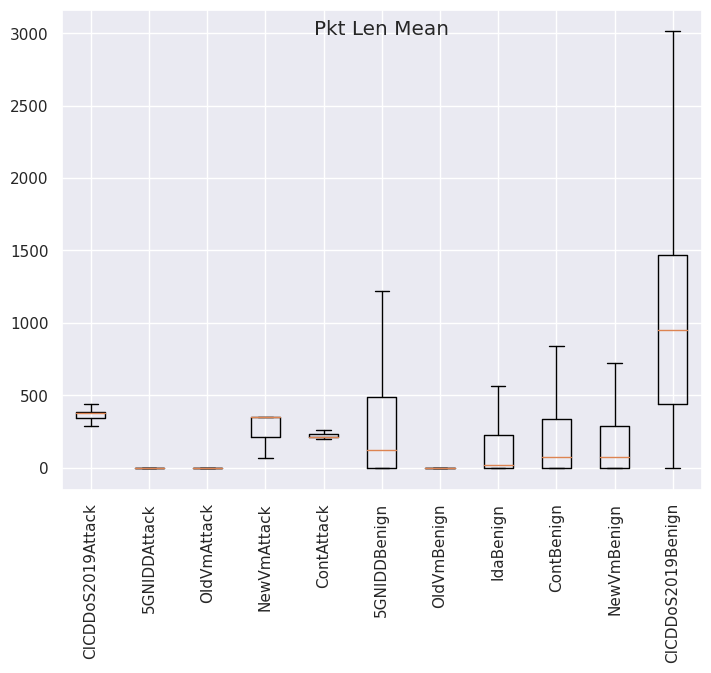

In [ ]:

newVmBenignTrafficDf['Pkt Len Mean']=newVmBenignTrafficDf['Pkt Len Mean'].fillna(0).astype(int)
containerBenignTrafficDf['Pkt Len Mean']=containerBenignTrafficDf['Pkt Len Mean'].fillna(0).astype(int)


data = [cicDDoS2019DfAttack['Pkt Len Mean'],nidd_attack_Df['Pkt Len Mean'],oldVmDfAttack['Pkt Len Mean'],newVmAttackTrafficDf['Pkt Len Mean'],
        containerAttackTrafficDf['Pkt Len Mean'], nidd_benign_Df['Pkt Len Mean'],
        oldVmDfBenign['Pkt Len Mean'], selectiveIdahoTrafficDf['Pkt Len Mean'], containerBenignTrafficDf['Pkt Len Mean'],
        newVmBenignTrafficDf['Pkt Len Mean'], cicDDoS2019DfBenign['Pkt Len Mean'] ]
fig, ax = plt.subplots()

plt.suptitle("Pkt Len Mean")

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data,showfliers=False)

# Show plot
plt.xticks(tick_numbers, tick_list)
plt.xticks(rotation=90)
plt.show()

In [ ]:
containerBenignTrafficDf['Flow Duration']=containerBenignTrafficDf['Flow Duration'].fillna(0).astype(int)

data = [cicDDoS2019DfAttack['Flow Duration'],nidd_attack_Df['Flow Duration'],
        oldVmDfAttack['Flow Duration'],newVmAttackTrafficDf['Flow Duration'],containerAttackTrafficDf['Flow Duration'],
        nidd_benign_Df['Flow Duration'],oldVmDfBenign['Flow Duration'],
        selectiveIdahoTrafficDf['Flow Duration'], containerBenignTrafficDf['Flow Duration'],
        newVmBenignTrafficDf['Flow Duration'],cicDDoS2019DfBenign['Flow Duration']]

fig, ax = plt.subplots()
plt.suptitle("Flow Duration in Second")

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data,showfliers=False)

# Show plot
plt.xticks(tick_numbers, tick_list)
plt.xticks(rotation=90)
plt.show()

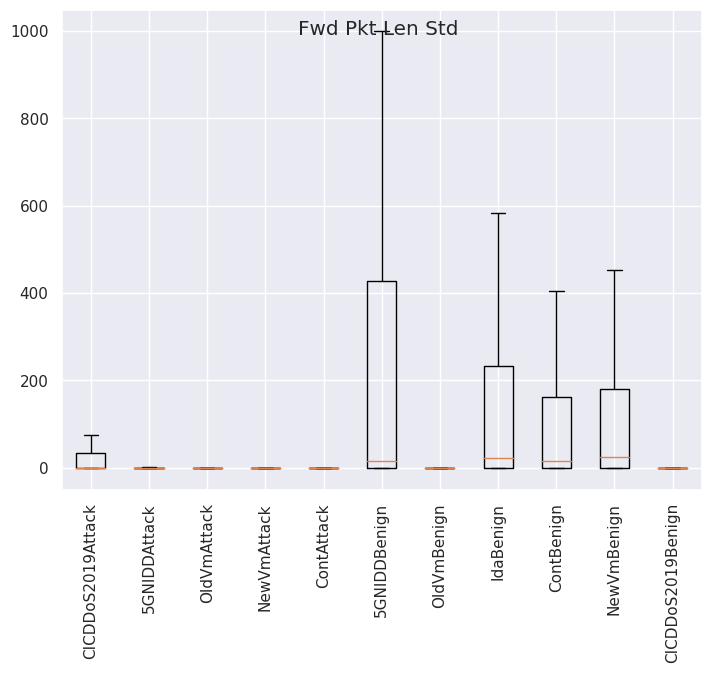

In [ ]:
fig, ax = plt.subplots()
plt.suptitle("Fwd Pkt Len Std ")


# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
containerBenignTrafficDf['Fwd Pkt Len Std']=containerBenignTrafficDf['Fwd Pkt Len Std'].fillna(0).astype(int)

data = [cicDDoS2019DfAttack['Fwd Pkt Len Std'],nidd_attack_Df['Fwd Pkt Len Std'],oldVmDfAttack['Fwd Pkt Len Std'],
        newVmAttackTrafficDf['Fwd Pkt Len Std'],containerAttackTrafficDf['Fwd Pkt Len Std'],nidd_benign_Df['Fwd Pkt Len Std'],
        oldVmDfBenign['Fwd Pkt Len Std'], selectiveIdahoTrafficDf['Fwd Pkt Len Std'], containerBenignTrafficDf['Fwd Pkt Len Std'],
        newVmBenignTrafficDf['Fwd Pkt Len Std'],cicDDoS2019DfBenign['Fwd Pkt Len Std']]

# Creating plot
bp = ax.boxplot(data,showfliers=False)

# Show plot
plt.xticks(tick_numbers, tick_list)
plt.xticks(rotation=90)
plt.show()

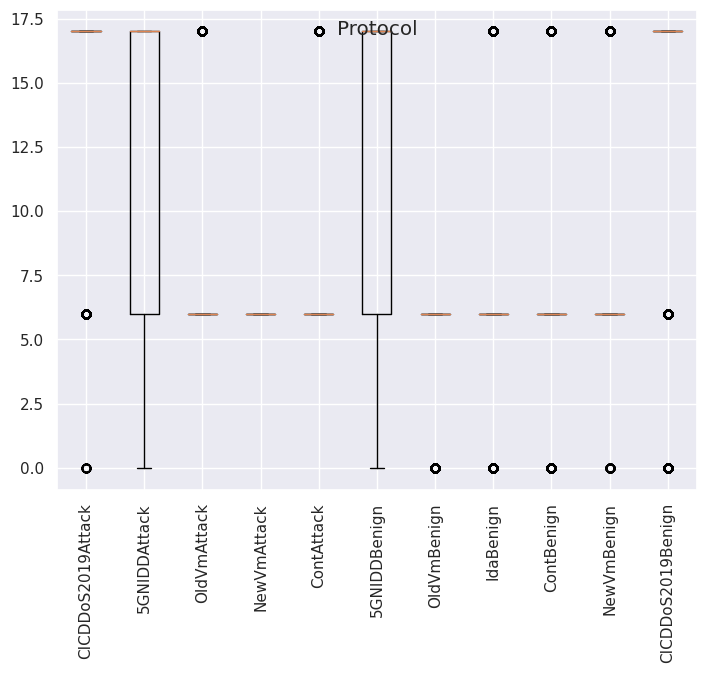

In [ ]:
from types import TracebackType
fig, ax = plt.subplots()
plt.suptitle("Protocol")

ax = fig.add_axes([0, 0, 1, 1])

containerBenignTrafficDf['Protocol']=containerBenignTrafficDf['Protocol'].fillna(0).astype(int)

data = [cicDDoS2019DfAttack['Protocol'],nidd_attack_Df['Protocol'],
        oldVmDfAttack['Protocol'], newVmAttackTrafficDf['Protocol'], containerAttackTrafficDf['Protocol'],
        nidd_benign_Df['Protocol'],oldVmDfBenign['Protocol'],
        selectiveIdahoTrafficDf['Protocol'], containerBenignTrafficDf['Protocol'],newVmBenignTrafficDf['Protocol'],cicDDoS2019DfBenign['Protocol']]

# Creating plot
bp = ax.boxplot(data,showfliers=True)
# Show plot
plt.xticks(tick_numbers, tick_list)
plt.xticks(rotation=90)
plt.show()

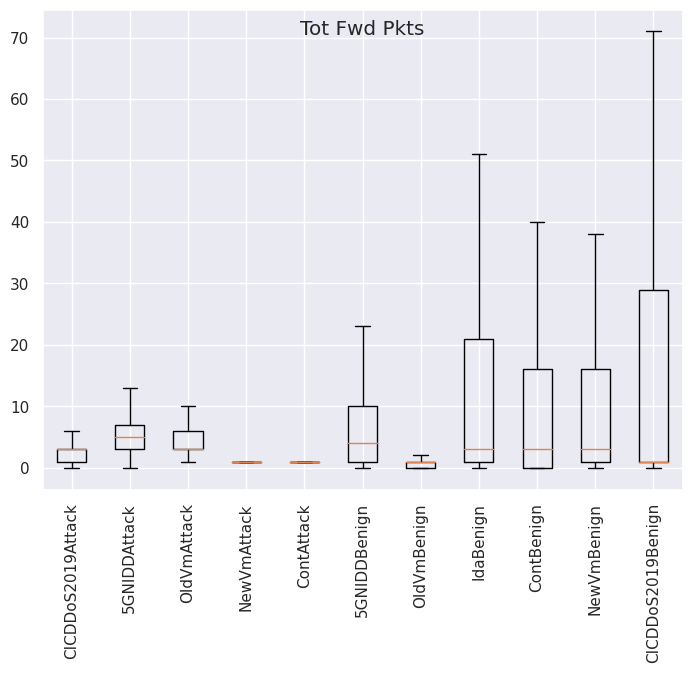

In [ ]:
# Creating histogram
fig, ax = plt.subplots()
plt.suptitle("Tot Fwd Pkts")

# Show plot
ax = fig.add_axes([0, 0, 1, 1])

containerBenignTrafficDf['Tot Fwd Pkts']=containerBenignTrafficDf['Tot Fwd Pkts'].fillna(0).astype(int)

data = [cicDDoS2019DfAttack['Tot Fwd Pkts'],nidd_attack_Df['Tot Fwd Pkts'],
        oldVmDfAttack['Tot Fwd Pkts'],newVmAttackTrafficDf['Tot Fwd Pkts'],
        containerAttackTrafficDf['Tot Fwd Pkts'],nidd_benign_Df['Tot Fwd Pkts'],
        oldVmDfBenign['Tot Fwd Pkts'], selectiveIdahoTrafficDf['Tot Fwd Pkts'],
        containerBenignTrafficDf['Tot Fwd Pkts'], newVmBenignTrafficDf['Tot Fwd Pkts'],cicDDoS2019DfBenign['Tot Fwd Pkts']]

# Creating plot
bp = ax.boxplot(data,showfliers=False)
# Show plot
plt.xticks(tick_numbers, tick_list)
plt.xticks(rotation=90)
# fig, ax2 = plt.subplots()
# bin=list (range (0, 30,10))
# print(bin)
# ax2.hist(data, bin)
plt.show()

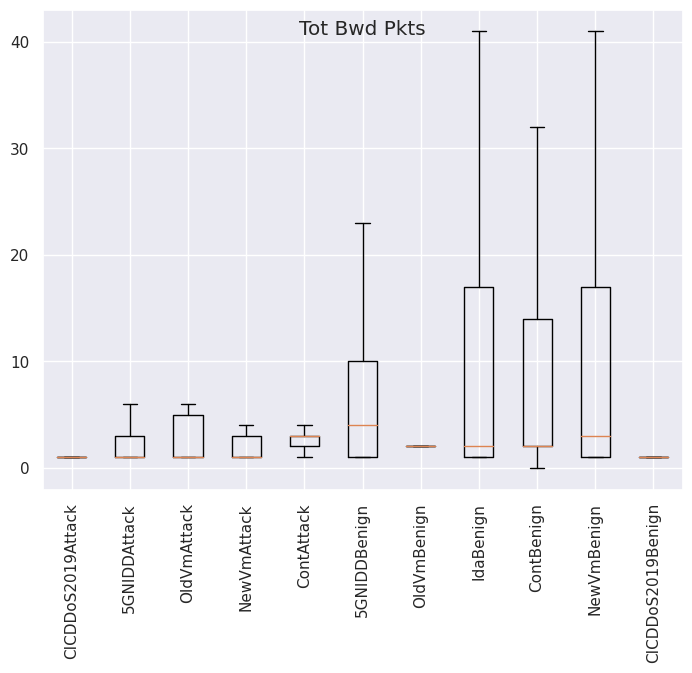

In [ ]:
# Creating histogram
fig, ax = plt.subplots()
# plt.xlim(0, 1000)
# plt.ylim(1, 2000)
plt.suptitle("Tot Bwd Pkts")

# Show plot
ax = fig.add_axes([0, 0, 1, 1])

containerBenignTrafficDf['Tot Bwd Pkts']=containerBenignTrafficDf['Tot Bwd Pkts'].fillna(0).astype(int)

data = [cicDDoS2019DfAttack['Tot Bwd Pkts'],nidd_attack_Df['Tot Bwd Pkts'],
        oldVmDfAttack['Tot Bwd Pkts'], newVmAttackTrafficDf['Tot Bwd Pkts'],  containerAttackTrafficDf['Tot Bwd Pkts'],
        nidd_benign_Df['Tot Bwd Pkts'],oldVmDfBenign['Tot Bwd Pkts'],
        selectiveIdahoTrafficDf['Tot Bwd Pkts'], containerBenignTrafficDf['Tot Bwd Pkts'], newVmBenignTrafficDf['Tot Bwd Pkts']
        ,cicDDoS2019DfBenign['Tot Bwd Pkts']]

# Creating plot
bp = ax.boxplot(data,showfliers=False)
plt.xticks(tick_numbers, tick_list)
plt.xticks(rotation=90)
# Show plot
plt.show()

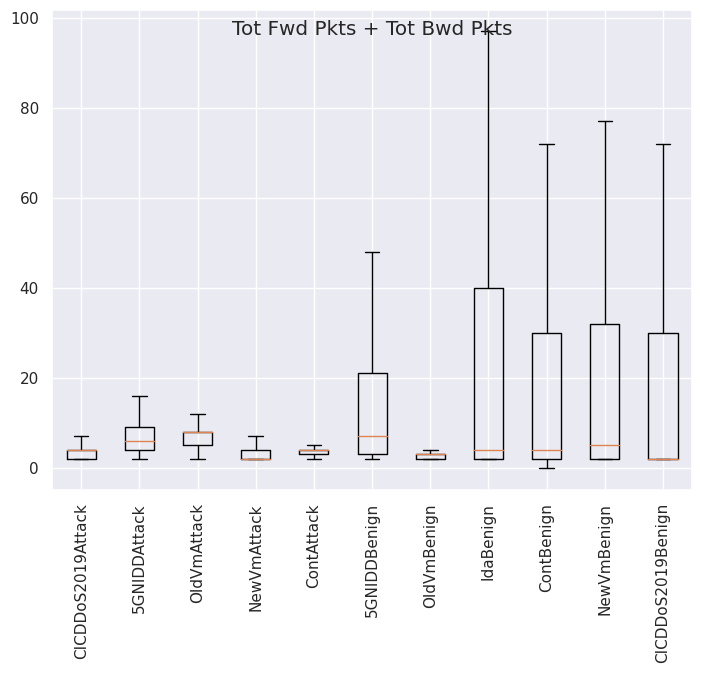

In [ ]:
# Creating histogram
fig, ax = plt.subplots()
# plt.xlim(0, 1000)
# plt.ylim(1, 2000)
plt.suptitle("Tot Fwd Pkts + Tot Bwd Pkts")

# Show plot
ax = fig.add_axes([0, 0, 1, 1])

# containerBenignTrafficDf['Tot Bwd Pkts']=containerBenignTrafficDf['Tot Bwd Pkts'].fillna(0).astype(int)

data = [cicDDoS2019DfAttack['Tot Fwd Pkts']+cicDDoS2019DfAttack['Tot Bwd Pkts'],
        nidd_attack_Df['Tot Fwd Pkts']+nidd_attack_Df['Tot Bwd Pkts'],
    oldVmDfAttack['Tot Fwd Pkts']+oldVmDfAttack['Tot Bwd Pkts'],
        newVmAttackTrafficDf['Tot Fwd Pkts']+newVmAttackTrafficDf['Tot Bwd Pkts'],
         containerAttackTrafficDf['Tot Fwd Pkts']+containerAttackTrafficDf['Tot Bwd Pkts'],
        nidd_benign_Df['Tot Fwd Pkts']+nidd_benign_Df['Tot Bwd Pkts'],
        oldVmDfBenign['Tot Fwd Pkts']+ oldVmDfBenign['Tot Bwd Pkts'],
        selectiveIdahoTrafficDf['Tot Fwd Pkts']+ selectiveIdahoTrafficDf['Tot Bwd Pkts'],
        containerBenignTrafficDf['Tot Fwd Pkts']+ containerBenignTrafficDf['Tot Bwd Pkts'],
        newVmBenignTrafficDf['Tot Fwd Pkts']+ newVmBenignTrafficDf['Tot Bwd Pkts'],
        cicDDoS2019DfBenign['Tot Fwd Pkts']+ cicDDoS2019DfBenign['Tot Bwd Pkts']
      ]

# Creating plot
bp = ax.boxplot(data,showfliers=False)
plt.xticks(tick_numbers, tick_list)
plt.xticks(rotation=90)
# Show plot
plt.show()

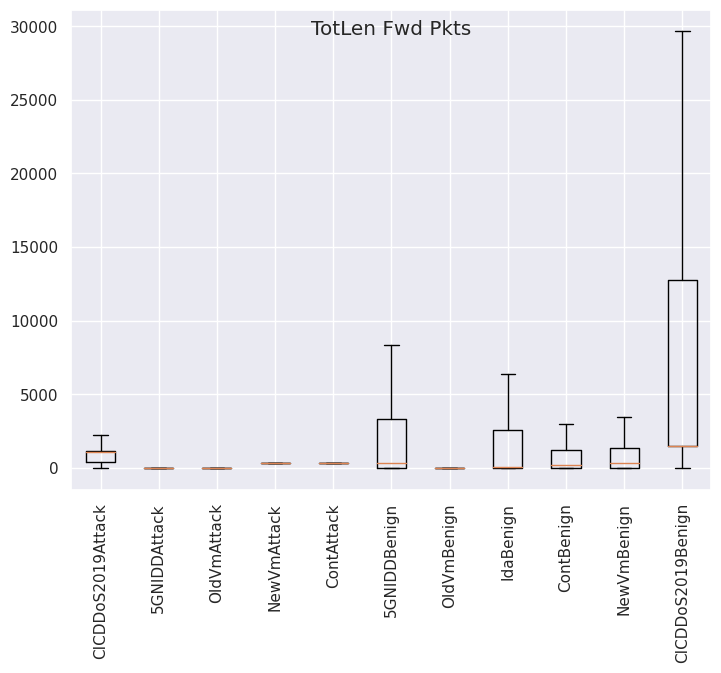

In [ ]:
# Creating histogram
fig, ax = plt.subplots()
# plt.xlim(0, 1000)
# plt.ylim(1, 2000)
plt.suptitle("TotLen Fwd Pkts")

# Show plot
ax = fig.add_axes([0, 0, 1, 1])
containerBenignTrafficDf['TotLen Fwd Pkts']=containerBenignTrafficDf['TotLen Fwd Pkts'].fillna(0).astype(int)

data = [cicDDoS2019DfAttack['TotLen Fwd Pkts'],nidd_attack_Df['TotLen Fwd Pkts'],
    oldVmDfAttack['TotLen Fwd Pkts'],newVmAttackTrafficDf['TotLen Fwd Pkts'], containerAttackTrafficDf['TotLen Fwd Pkts'],
        nidd_benign_Df['TotLen Fwd Pkts'],oldVmDfBenign['TotLen Fwd Pkts'], selectiveIdahoTrafficDf['TotLen Fwd Pkts'],
        containerBenignTrafficDf['TotLen Fwd Pkts'],newVmBenignTrafficDf['TotLen Fwd Pkts'],
         cicDDoS2019DfBenign['TotLen Fwd Pkts']]

# Creating plot
bp = ax.boxplot(data,showfliers=False)
plt.xticks(tick_numbers, tick_list)
plt.xticks(rotation=90)
# Show plot
plt.show()

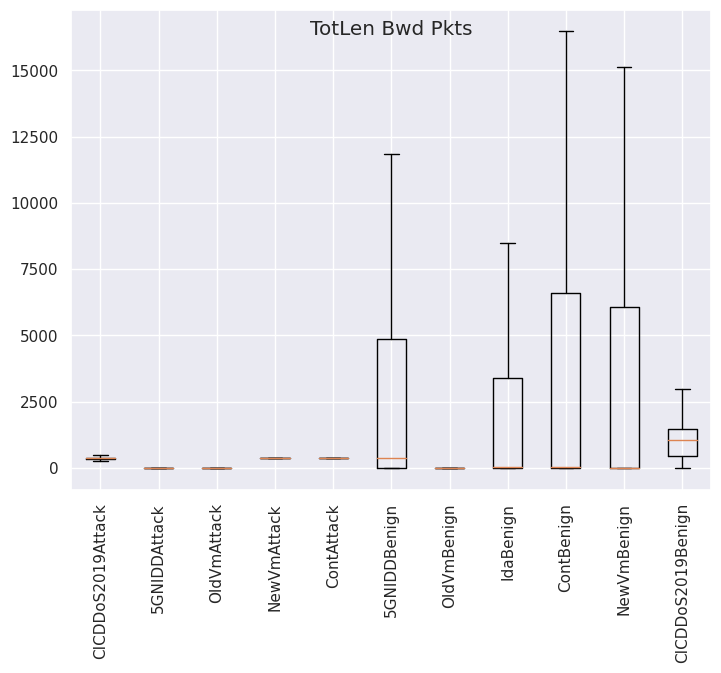

In [ ]:
# Creating histogram
fig, ax = plt.subplots()
# plt.xlim(0, 1000)
# plt.ylim(1, 2000)
plt.suptitle("TotLen Bwd Pkts")

# Show plot
ax = fig.add_axes([0, 0, 1, 1])

containerBenignTrafficDf['TotLen Bwd Pkts']=containerBenignTrafficDf['TotLen Bwd Pkts'].fillna(0).astype(int)

data = [cicDDoS2019DfAttack['TotLen Bwd Pkts'],nidd_attack_Df['TotLen Bwd Pkts'],
        oldVmDfAttack['TotLen Bwd Pkts'], newVmAttackTrafficDf['TotLen Bwd Pkts'],containerAttackTrafficDf['TotLen Bwd Pkts'],
        nidd_benign_Df['TotLen Bwd Pkts'],oldVmDfBenign['TotLen Bwd Pkts'], selectiveIdahoTrafficDf['TotLen Bwd Pkts']
        , containerBenignTrafficDf['TotLen Bwd Pkts'], newVmBenignTrafficDf['TotLen Bwd Pkts']
        , cicDDoS2019DfBenign['TotLen Bwd Pkts']]

# Creating plot
bp = ax.boxplot(data,showfliers=False)
plt.xticks(tick_numbers, tick_list)
plt.xticks(rotation=90)
# Show plot
plt.show()

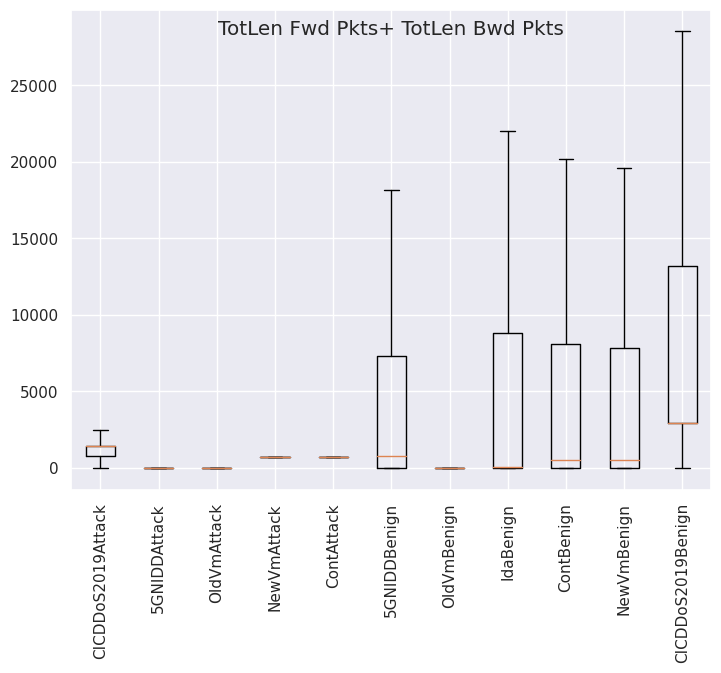

In [ ]:
# Creating histogram
# fig, ax = plt.subplots(figsize=(8, 10))
fig, ax = plt.subplots()
# plt.xlim(0, 1000)
# plt.ylim(1, 2000)
plt.suptitle("TotLen Fwd Pkts+ TotLen Bwd Pkts")

# Show plot
ax = fig.add_axes([0, 0, 1, 1])
data = [cicDDoS2019DfAttack['TotLen Fwd Pkts']+cicDDoS2019DfAttack['TotLen Bwd Pkts'],
        nidd_attack_Df['TotLen Fwd Pkts']+nidd_attack_Df['TotLen Bwd Pkts'],
    oldVmDfAttack['TotLen Fwd Pkts']+oldVmDfAttack['TotLen Bwd Pkts'],
        newVmAttackTrafficDf['TotLen Fwd Pkts']+newVmAttackTrafficDf['TotLen Bwd Pkts'],
        containerAttackTrafficDf['TotLen Fwd Pkts']+containerAttackTrafficDf['TotLen Bwd Pkts'],
       nidd_benign_Df['TotLen Fwd Pkts']+nidd_benign_Df['TotLen Bwd Pkts'],
        oldVmDfBenign['TotLen Fwd Pkts']+ oldVmDfBenign['TotLen Bwd Pkts'],
        selectiveIdahoTrafficDf['TotLen Fwd Pkts']+ selectiveIdahoTrafficDf['TotLen Bwd Pkts'],
        containerBenignTrafficDf['TotLen Fwd Pkts']+ containerBenignTrafficDf['TotLen Bwd Pkts'],
        newVmBenignTrafficDf['TotLen Fwd Pkts']+ newVmBenignTrafficDf['TotLen Bwd Pkts'],
        cicDDoS2019DfBenign['TotLen Fwd Pkts']+ cicDDoS2019DfBenign['TotLen Bwd Pkts']]

# Creating plot
bp = ax.boxplot(data,showfliers=False)
plt.xticks(tick_numbers, tick_list)
plt.xticks(rotation=90)
# Show plot
plt.show()